In [89]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [90]:
furniture = pd.read_csv("trash-data-melbourne-grouped-2.csv")
furniture['Date'].min(), furniture['Date'].max()

('2014/01/03', '2017/12/30')

In [91]:
#cols = ['Row ID', 'Latitude', 'Longitude', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
cols = ['Row ID','Latitude','Longitude']
#furniture.drop(cols, axis=1, inplace=True)
#furniture = furniture.sort_values('Order Date')
#furniture = furniture.sort_values('Date')
#furniture.isnull().sum()
#furniture.head()
furniture['Date'] = pd.to_datetime(furniture['Date'],dayfirst=True,infer_datetime_format=True)
furniture = furniture.sort_values('Date')
#furniture.isnull().sum()
furniture.head()

,Row ID,Date,Fills,Latitude,Longitude
0,1,2014-01-03,0,-37.802,145.042
1,2,2014-01-04,3,-37.802,145.042
2,3,2014-01-05,1,-37.802,145.042
3,4,2014-01-06,3,-37.802,145.042
4,5,2014-01-07,3,-37.802,145.042


In [92]:
#furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
#furniture = furniture.groupby('Date')['Fills'].sum().reset_index()
#furniture.head()

In [93]:
#furniture = furniture.set_index('Order Date')
furniture = furniture.set_index('Date')
furniture.index

#data = furniture.set_index('')

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)

In [94]:
data = furniture.loc[:,['Fills']]
data.head()

,Fills
Date,
2014-01-03,0
2014-01-04,3
2014-01-05,1
2014-01-06,3
2014-01-07,3


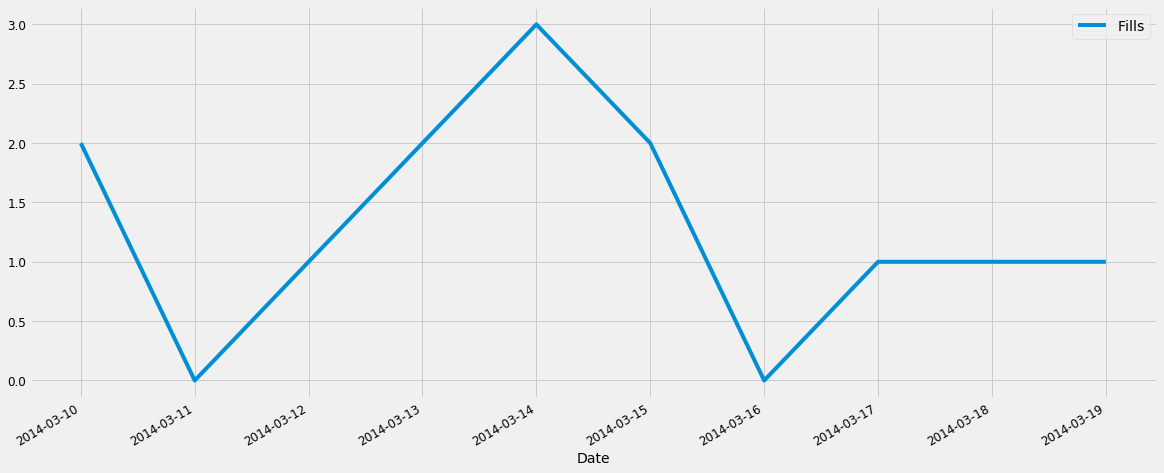

In [95]:
data['2014-03-10':'2014-03-20'].plot()

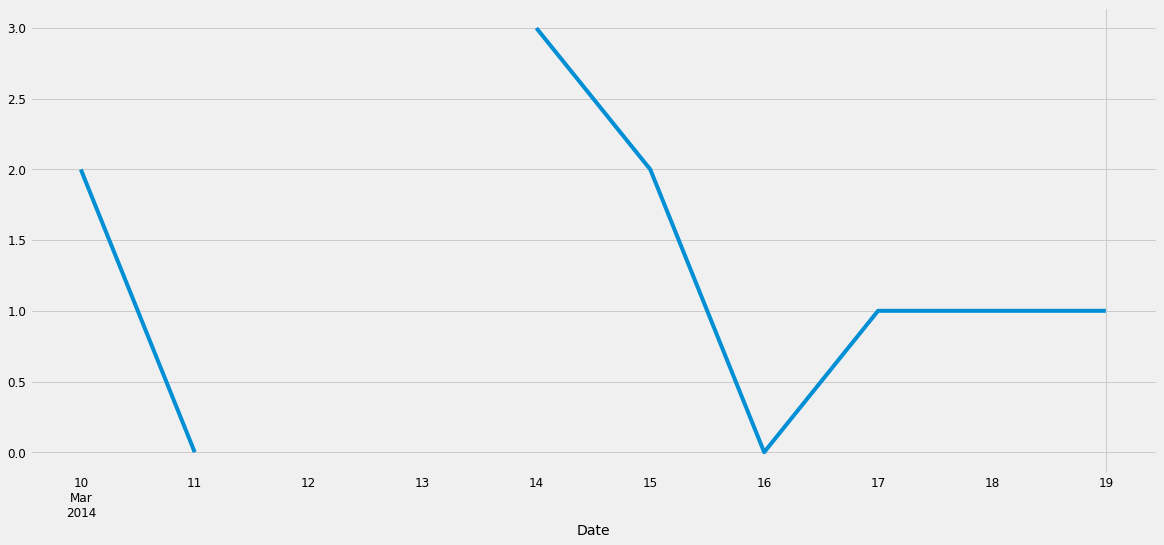

In [96]:
#y = furniture['Fills'].resample('MS').mean()
#y['2017':]
#y=furniture
daily = data['Fills'].resample('D').mean()
daily['2014-03-10':'2014-03-20':].plot()

In [97]:
daily.fillna(value=0.0,inplace=True)
daily['2017':].head()

Date
2017-01-01    0.0
2017-01-02    1.0
2017-01-03    0.0
2017-01-04    0.0
2017-01-05    0.0
Freq: D, Name: Fills, dtype: float64

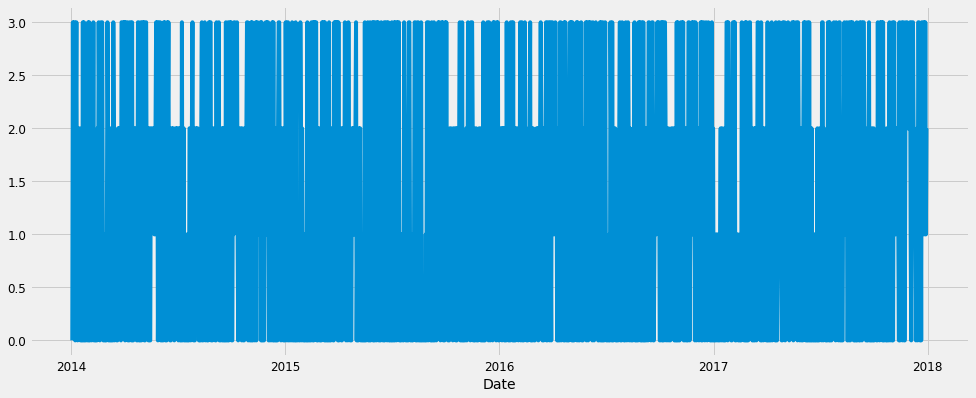

In [98]:
daily.plot(figsize=(15,6 ))
plt.show()

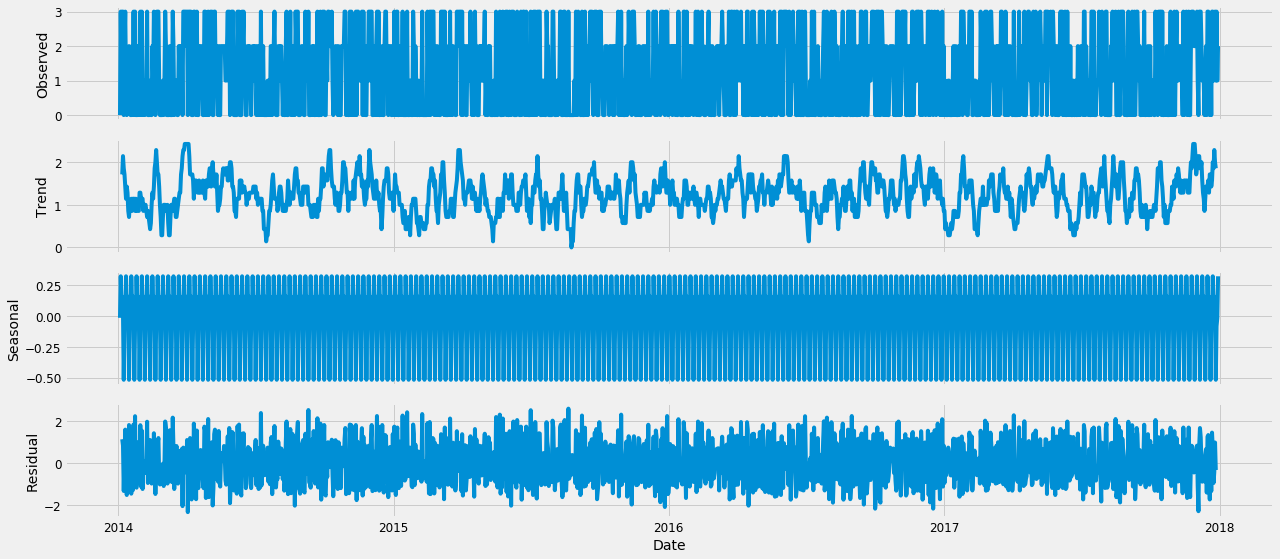

In [99]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(daily, model='additive')
fig = decomposition.plot()
plt.show()

In [100]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        mod = sm.tsa.statespace.SARIMAX(daily,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

        results = mod.fit()

        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
       
            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5703.062003161609
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5402.429550978974
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5626.16097825371
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4576.571955479523
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5225.683785806448
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4624.038172644771
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5164.123332869236
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4580.860793620668
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5428.124603269302
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:5261.134182335435
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5623.863943971681
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4575.307534729533
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5182.0646701028345
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4621.293441042701
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5165.764791926167
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4579.758887954688
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5615.179642649002
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5569.010796404708
ARIMA(0, 1

In [103]:
mod = sm.tsa.statespace.SARIMAX(daily,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0152      0.026     -0.573      0.567      -0.067       0.037
ma.L1         -1.0000      3.099     -0.323      0.747      -7.075       5.075
ar.S.L12      -0.5054      0.027    -18.879      0.000      -0.558      -0.453
sigma2         2.1404      6.627      0.323      0.747     -10.848      15.129


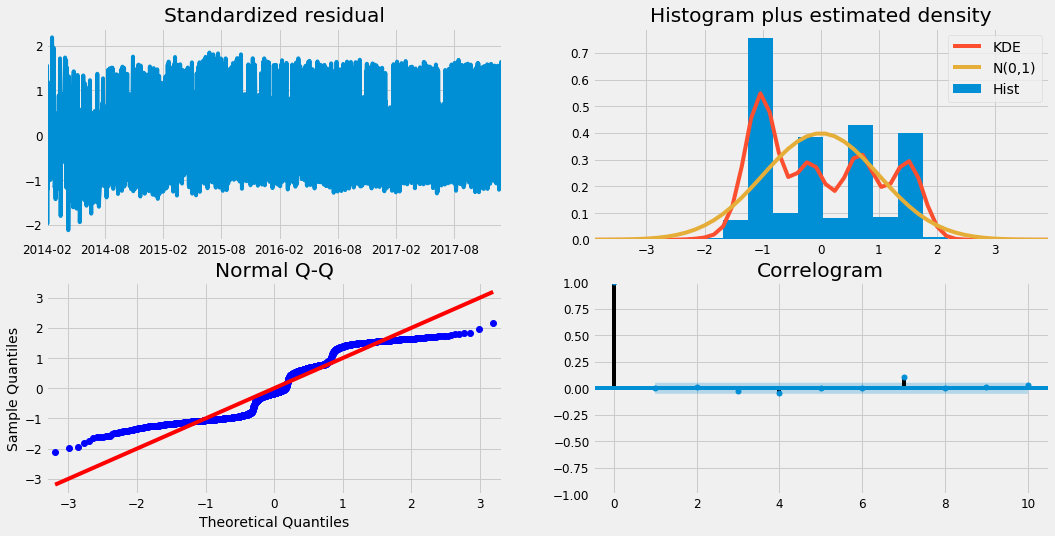

In [87]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

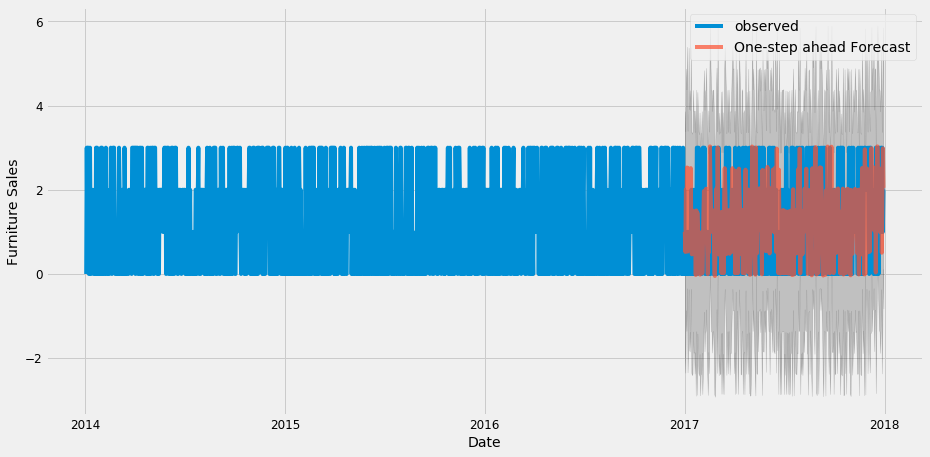

In [116]:
pred = results.get_prediction(start=pd.to_datetime('2017'), dynamic=False)
pred_ci = pred.conf_int()

ax = daily['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [111]:
daily_forecasted = pred.predicted_mean
daily_truth = daily['2017-01-01':]

mse = ((daily_forecasted - daily_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.16


In [112]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1.08


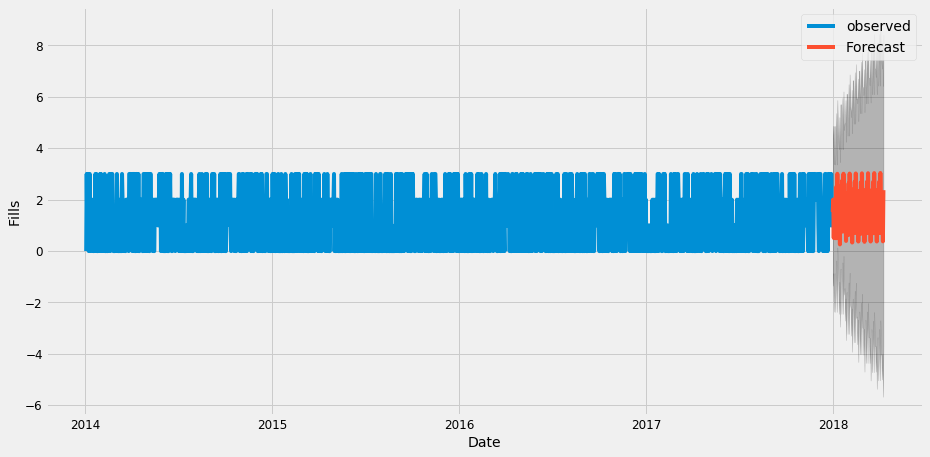

In [114]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = daily.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Fills')

plt.legend()
plt.show()